# Customer Segmentation Using Clustering Algorithms

`Author:` [Prashant Sharma](https://github.com/Prashantpq)\
`Date:` 11.December.2024\
`Dataset:` [Credit Card Customer Segmentation](https://zenodo.org/records/4322342#.Y8OsBdJBwUE)

### About Dataset (Meta data)
#### Context
This dataset contains a wealth of customer information collected from within a consumer credit card portfolio, with the aim of helping analysts predict customer attrition. It includes comprehensive demographic details such as age, gender, marital status and income category, as well as insight into each customer’s relationship with the credit card provider such as the card type, number of months on book and inactive periods. Additionally it holds key data about customers’ spending behavior drawing closer to their churn decision such as total revolving balance, credit limit, average open to buy rate and analyzable metrics like total amount of change from quarter 4 to quarter 1, average utilization ratio and Naive Bayes classifier attrition flag (Card category is combined with contacts count in 12months period alongside dependent count plus education level & months inactive). Faced with this set of useful predicted data points across multiple variables capture up-to-date information that can determine long term account stability or an impending departure therefore offering us an equipped understanding when seeking to manage a portfolio or serve individual customers.

### Content
#### Column Descriptions:
* `CLIENTNUM:` Unique identifier for each customer. (Integer).
* `Attrition_Flag:` Flag indicating whether or not the customer has churned out. (Boolean).
* `Customer_Age:` Age of customer. (Integer).
* `Gender:` The text or lyrics that song contain.
* `Dependent_count:` Number of dependents that customer has. (Integer)
* `Education_Level:` Education level of customer. (String)
* `Marital_Status:` Marital status of customer. (String)
* `Income_Category:` Income category of customer. (String)
* `Card_Category:` Type of card held by customer. (String)
* `Months_on_book:` How long customer has been on the books. (Integer)
* `Total_Relationship_Count:` Total number of relationships customer has with the credit card provider. (Integer)
* `Months_Inactive_12_mon:` Number of months customer has been inactive in the last twelve months. (Integer)
* `Contacts_Count_12_mon:` Number of contacts customer has had in the last twelve months. (Integer)
* `Credit_Limit:` Credit limit of customer. (Integer)
* `Total_Revolving_Bal:` Total revolving balance of customer. (Integer)
* `Avg_Open_To_Buy:` Average open to buy ratio of customer. (Integer)
* `Total_Amt_Chng_Q4_Q1:` Total amount changed from quarter 4 to quarter 1. (Integer)
* `Total_Trans_Amt:` Total transaction amount. (Integer)
* `Total_Trans_Ct:` Total transaction count. (Integer)
* `Total_Ct_Chng_Q4_Q1:` Total count changed from quarter 4 to quarter 1. (Integer)
* `Avg_Utilization_Ratio:` Average utilization ratio of customer. (Integer)
* `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1:` Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such 


# `Import Libraries`

In [93]:
# Import libraries

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and utilities
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

# `Load the Dataset`

In [94]:
df = pd.read_csv('Data/BankChurners.csv')

# Display the first 10 rows of the dataset
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


# `Data Preprocessing`

In [95]:
# Explore the data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

`There are some categorical columns too in the dataset and most of the columns are of numerical data`
* `Categorical columns:` Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, Card_Category 

In [96]:
#Checking the data shape
df.shape

(10127, 23)

In [97]:
# Check for missing values in the dataset
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

`There are no missing values in the dataset`

In [98]:
# Check NaN values in the entire dataset
nan_values = df.isna().sum()
print("NaN values in each column:\n", nan_values)

NaN values in each column:
 CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category     

`There are no nan values in the dataset`

In [99]:
# Summary statistics of numerical columns
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [100]:
# Check unique values in categorical columns
print("Attrition_Flag:", df['Attrition_Flag'].unique())
print("Gender:", df['Gender'].unique())
print("Education_Level:", df['Education_Level'].unique())
print("Marital_Status:", df['Marital_Status'].unique())
print("Income_Category:", df['Income_Category'].unique())
print("Card_Category:", df['Card_Category'].unique())

Attrition_Flag: ['Existing Customer' 'Attrited Customer']
Gender: ['M' 'F']
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']


In [101]:
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [102]:
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'CLIENTNUM'], axis=1)

`There was no use of these columns for customer segmentation so we have dropped it`

In [103]:
df.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


# `Exploratory Data Analysis (EDA)`

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

# `Analysis of Attrition_Flag Column`

In [105]:
# Find the values of atrrition_flag column
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

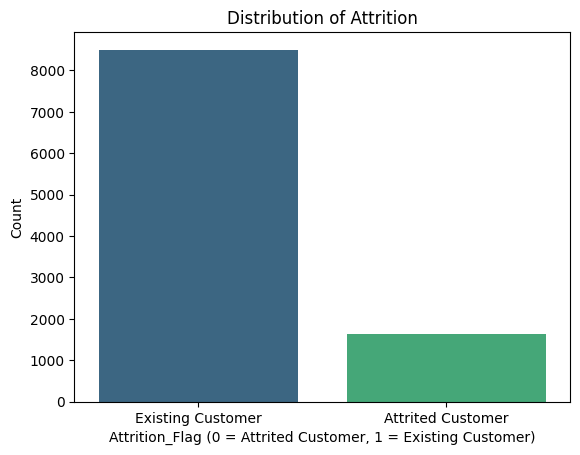

In [106]:
sns.countplot(x='Attrition_Flag', hue='Attrition_Flag', data=df, palette='viridis', legend=False)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition_Flag (0 = Attrited Customer, 1 = Existing Customer)')
plt.ylabel('Count')
plt.show()


In [107]:
# calculating the percentage fo Existing Customer and Attrited Customer value counts in the data

Existing_count = 8500
Attrited_count = 1627

total_count = Existing_count + Attrited_count

# calculate percentages
Existing_percentage = (Existing_count/total_count)*100
Attrited_percentages = (Attrited_count/total_count)*100

# display the results
print(f'Existing percentage in the data: {Existing_percentage:.2f}%')
print(f'Attrited percentage in the data: {Attrited_percentages:.2f}%')

Existing percentage in the data: 83.93%
Attrited percentage in the data: 16.07%


`Existing Customers are way more than Attrited Customers`

# `Analysis of Customer_Age Column`

In [108]:
print('Age Summary Statistics:')
df['Customer_Age'].describe()

Age Summary Statistics:


count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

In [109]:
df['Customer_Age'].min(), df['Customer_Age'].max()

(np.int64(26), np.int64(73))

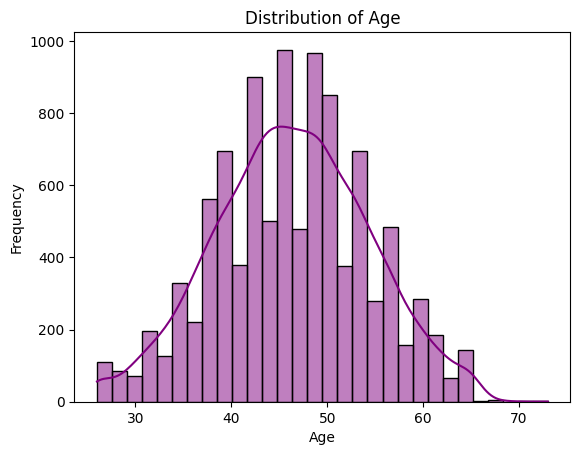

In [110]:
sns.histplot(df['Customer_Age'], kde=True, bins=30, color='purple')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

`Age Coloumn seems to be normally distributed`

Mean 46.32596030413745
Median 46.0
Mode 0    44
Name: Customer_Age, dtype: int64


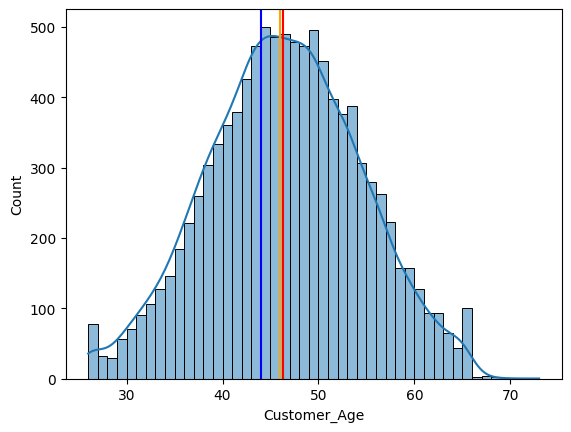

In [111]:
sns.histplot(df['Customer_Age'], kde=True)
plt.axvline(df['Customer_Age'].mean(), color='Red')
plt.axvline(df['Customer_Age'].median(), color= 'orange')
plt.axvline(df['Customer_Age'].mode()[0], color='Blue')

# print the value of mean, median and mode of age column
print('Mean', df['Customer_Age'].mean())
print('Median', df['Customer_Age'].median())
print('Mode', df['Customer_Age'].mode())

`The Age Column has a central tendency`

# `Exploring Gender Column`

In [112]:
# Find the values of sex column
df['Gender'].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

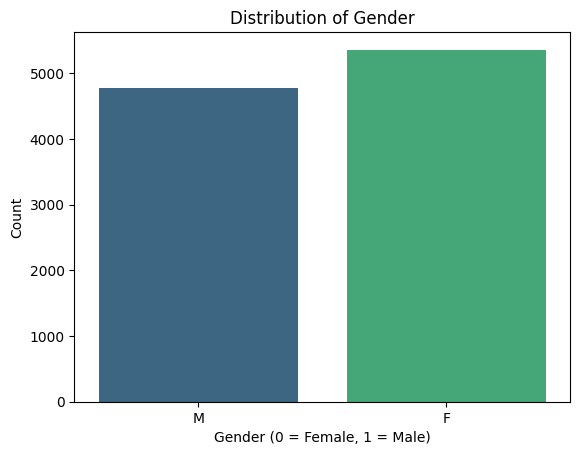

In [113]:
sns.countplot(x='Gender',hue='Gender', data=df, palette='viridis', legend=False)
plt.title('Distribution of Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

In [114]:
# calculating the percentage fo male and female value counts in the data

male_count = 4769
female_count = 5358

total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

# display the results
print(f'Male percentage in the data: {male_percentage:.2f}%')
print(f'Female percentage in the data: {female_percentages:.2f}%')

Male percentage in the data: 47.09%
Female percentage in the data: 52.91%


`Females are more than 50% in the dataset`

# `Exploring Education_Level Column`

In [115]:
# Find count of enducation_level column

df['Education_Level'].value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

`Most of the users are Graduates`

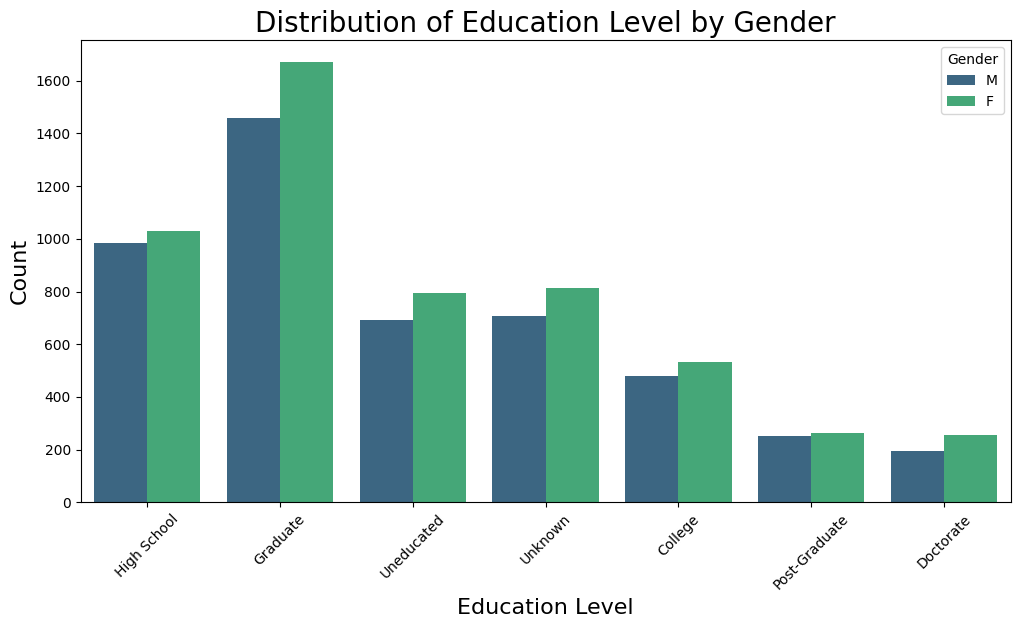

In [116]:
plt.figure(figsize=(12, 6))

sns.countplot(
    x='Education_Level',
    data=df,
    hue='Gender',
    palette='viridis',
    dodge=True 
)
plt.title('Distribution of Education Level by Gender', fontsize=20)
plt.xlabel('Education Level', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45)
plt.show()

`At every education level females are more compare to males`

# `Exploring Marital_Status Column `

In [117]:
# Find the count of marital status column

df['Marital_Status'].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

`Most of the users are married followed by single`

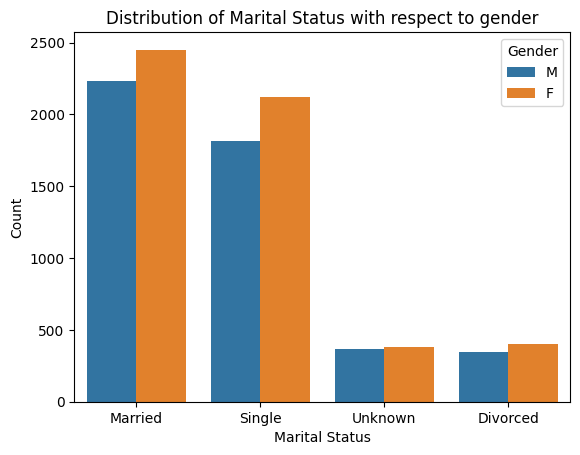

In [118]:
sns.countplot(x='Marital_Status', hue='Gender', data=df, dodge=True)
plt.title('Distribution of Marital Status with respect to gender')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

`Again most the Married users are females`

Text(0.5, 1.0, 'Distrubution of Marital Status with respect to their Education Level')

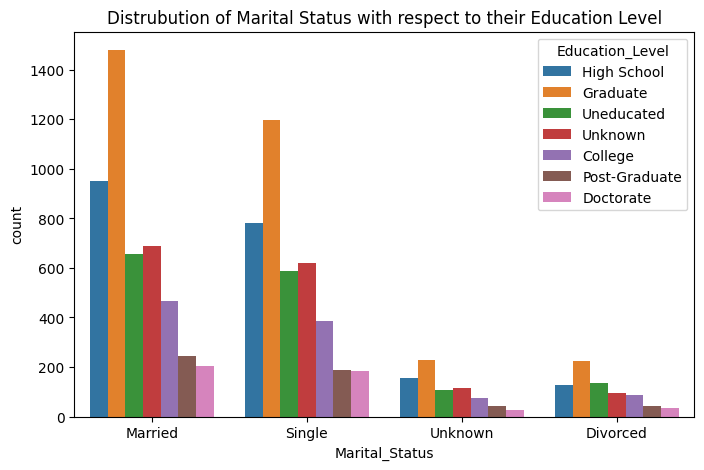

In [119]:
plt.figure(figsize=(8,5))
sns.countplot(x='Marital_Status', data=df, hue='Education_Level', dodge=True)
plt.title('Distrubution of Marital Status with respect to their Education Level')

`Graduate Users are higher at every marital status, most of them are married followed by single`

# `Analysis of Income Category Column`

In [120]:
# Find the count of income category column
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

`Most of the users has less than $40k income`

Text(0.5, 1.0, 'Distribution of Income Category')

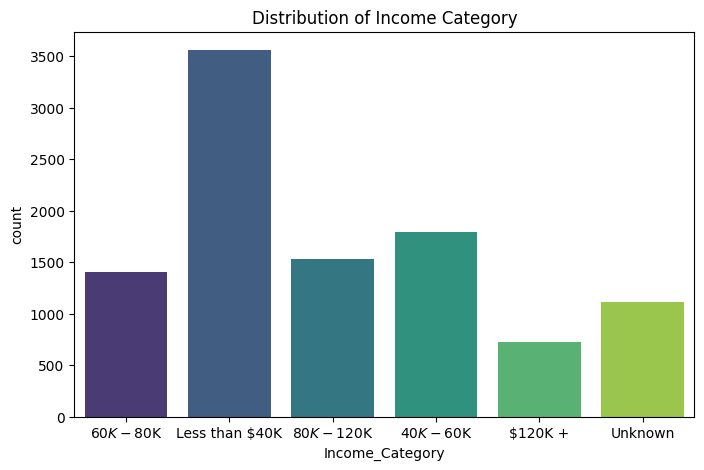

In [121]:
plt.figure(figsize=(8,5))
sns.countplot(x='Income_Category', hue='Income_Category', data=df, palette='viridis', legend=False)
plt.title('Distribution of Income Category')

Text(0.5, 1.0, 'Distrubution of Income Category with respect to gender')

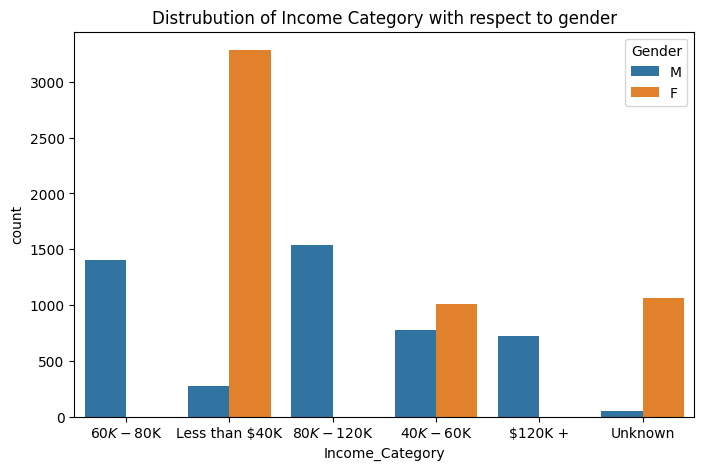

In [122]:
plt.figure(figsize=(8,5))
sns.countplot(x='Income_Category', data=df, hue='Gender', legend=True, dodge=True)
plt.title('Distrubution of Income Category with respect to gender')

* `Insights:` Most of the females fall under less then $40k income category and most of the males fall under $80k-$120k income category

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

# `Identifying and Handling Outliers`

Column: Customer_Age
Number of outliers: 2


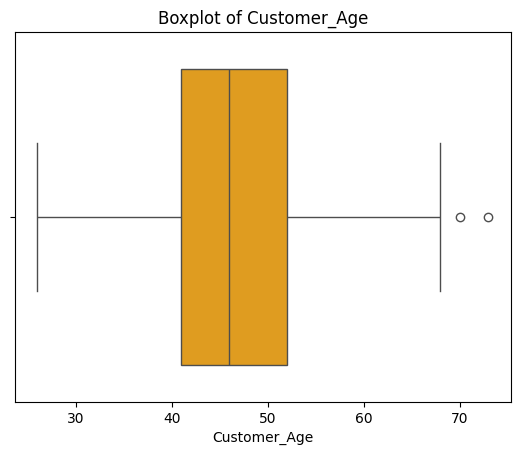

After handling outliers, dataset shape: (10125, 20)
Column: Dependent_count
Number of outliers: 0


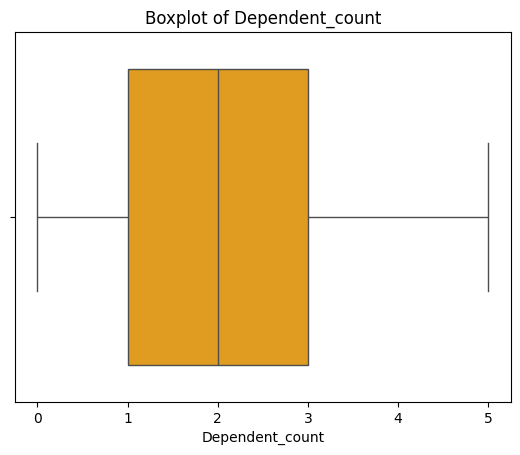

After handling outliers, dataset shape: (10125, 20)
Column: Months_on_book
Number of outliers: 385


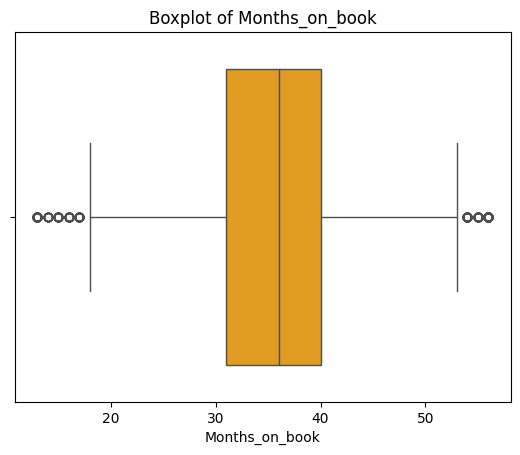

After handling outliers, dataset shape: (9740, 20)
Column: Total_Relationship_Count
Number of outliers: 0


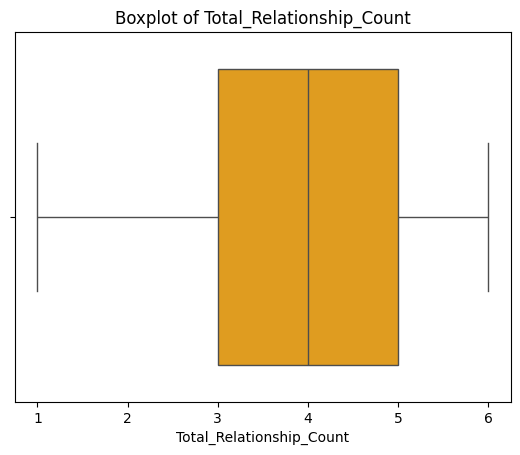

After handling outliers, dataset shape: (9740, 20)
Column: Months_Inactive_12_mon
Number of outliers: 308


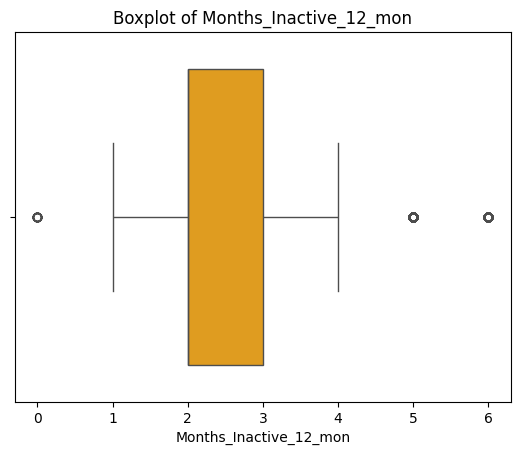

After handling outliers, dataset shape: (9432, 20)
Column: Contacts_Count_12_mon
Number of outliers: 584


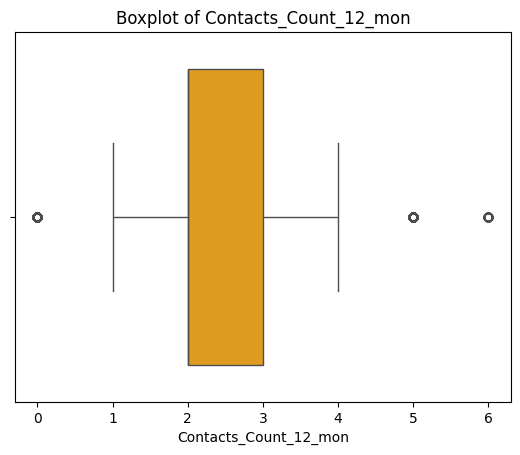

After handling outliers, dataset shape: (8848, 20)
Column: Credit_Limit
Number of outliers: 859


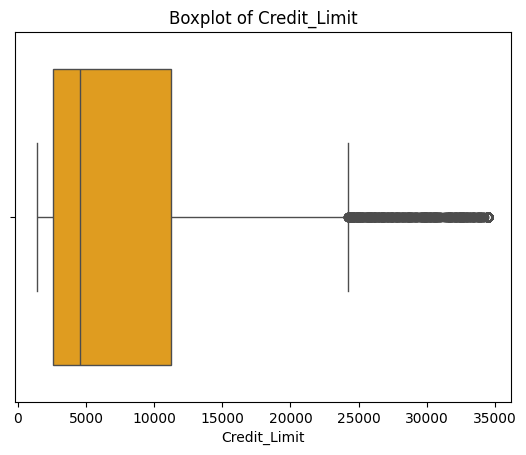

After handling outliers, dataset shape: (7989, 20)
Column: Total_Revolving_Bal
Number of outliers: 0


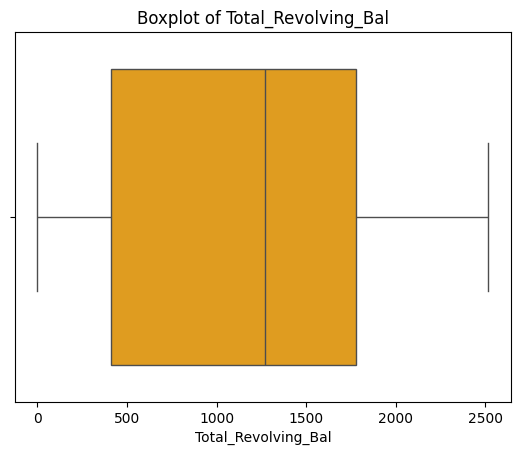

After handling outliers, dataset shape: (7989, 20)
Column: Avg_Open_To_Buy
Number of outliers: 467


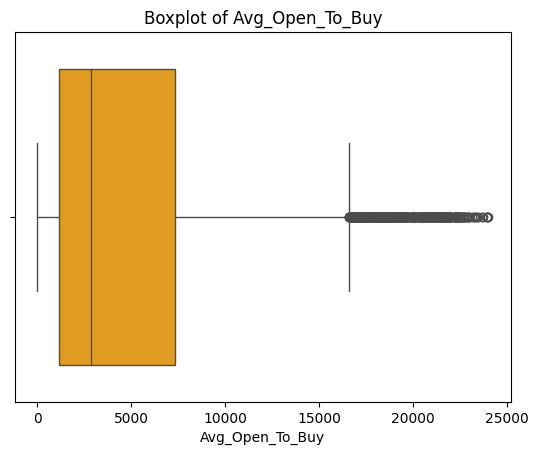

After handling outliers, dataset shape: (7522, 20)
Column: Total_Amt_Chng_Q4_Q1
Number of outliers: 289


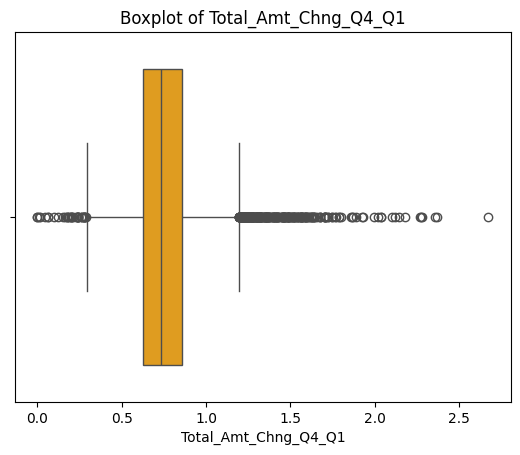

After handling outliers, dataset shape: (7233, 20)
Column: Total_Trans_Amt
Number of outliers: 575


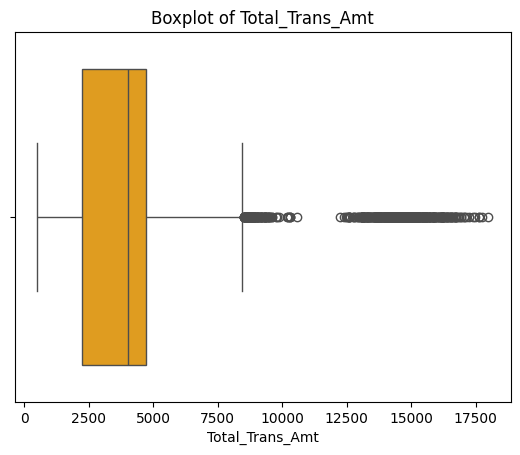

After handling outliers, dataset shape: (6658, 20)
Column: Total_Trans_Ct
Number of outliers: 0


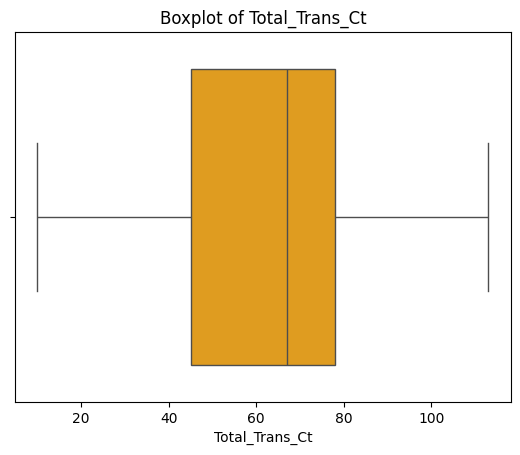

After handling outliers, dataset shape: (6658, 20)
Column: Total_Ct_Chng_Q4_Q1
Number of outliers: 195


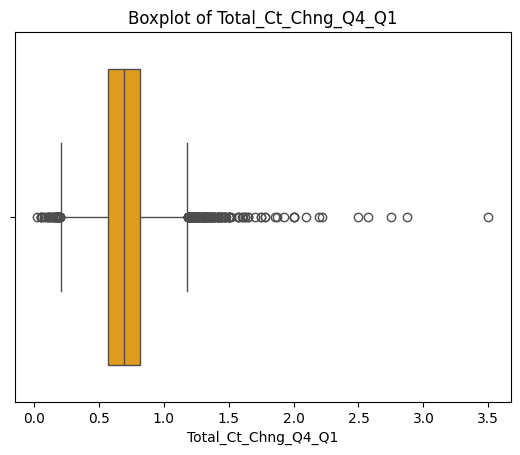

After handling outliers, dataset shape: (6463, 20)
Column: Avg_Utilization_Ratio
Number of outliers: 0


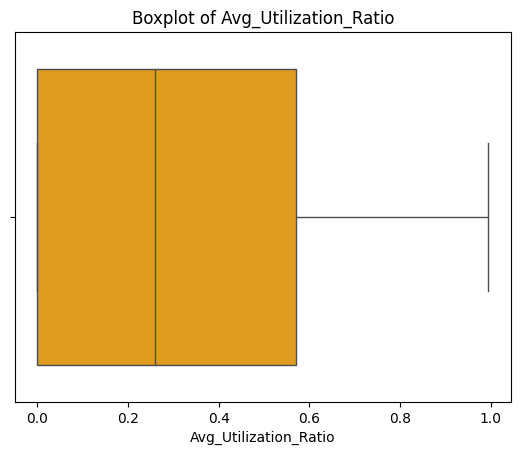

After handling outliers, dataset shape: (6463, 20)


In [125]:
# List of numerical columns
numerical_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
for col in numerical_columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    
    # Visualization
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()
    
    # Handle outliers: Remove rows with outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"After handling outliers, dataset shape: {df.shape}")


In [126]:
df.shape

(6463, 20)

In [127]:
df.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
14,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
24,Existing Customer,54,M,2,Unknown,Married,$80K - $120K,Blue,42,4,2,3,12217.0,0,12217.0,1.075,1110,21,0.750,0.000
25,Existing Customer,41,F,3,Graduate,Single,Less than $40K,Blue,28,6,1,2,7768.0,1669,6099.0,0.797,1051,22,0.833,0.215
34,Existing Customer,58,M,0,Graduate,Married,$80K - $120K,Blue,49,6,2,2,12555.0,1696,10859.0,0.519,1291,24,0.714,0.135
35,Existing Customer,55,F,1,College,Single,Less than $40K,Blue,36,4,2,1,3520.0,1914,1606.0,0.510,1407,43,0.483,0.544
44,Existing Customer,38,F,4,Graduate,Single,Unknown,Blue,28,2,3,3,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209


`Analysis of plotting`

> * Everything seems fine and there are no outliers in the columns.
> * Columns are cleaned from outliers and also there are no missing values in the dataset.
> * The next step is Feature Scaling but before that we need to encode the categorical columns.

In [128]:
# label Encoding

from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['Attrition_Flag','Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [129]:
df.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,1,42,1,5,5,3,0,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
14,1,57,0,2,2,1,4,0,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,1,45,0,2,2,1,5,0,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,0,62,0,0,2,1,4,0,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,1,47,0,4,6,2,4,0,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
24,1,54,1,2,6,1,3,0,42,4,2,3,12217.0,0,12217.0,1.075,1110,21,0.750,0.000
25,1,41,0,3,2,2,4,0,28,6,1,2,7768.0,1669,6099.0,0.797,1051,22,0.833,0.215
34,1,58,1,0,2,1,3,0,49,6,2,2,12555.0,1696,10859.0,0.519,1291,24,0.714,0.135
35,1,55,0,1,0,2,4,0,36,4,2,1,3520.0,1914,1606.0,0.510,1407,43,0.483,0.544
44,1,38,0,4,2,2,5,0,28,2,3,3,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209


`Now everything is good to go`

# `Feature Scaling`

In [130]:
scalar=StandardScaler()
scaled_df = scalar.fit_transform(df)

# `Dimentionality Reduction`
Converting the DataFrame into 2D DataFrame for visualization

In [131]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,1.576037,0.188933
1,-0.114062,-1.763207
2,2.366168,0.871814
3,1.560829,-3.771393
4,-0.099488,-2.768796
...,...,...
6458,1.432810,0.200919
6459,1.603994,0.811521
6460,0.177032,0.887172
6461,1.157564,1.442156


# `Hyperparameter tuning`
### Finding 'k' value by Elbow Method

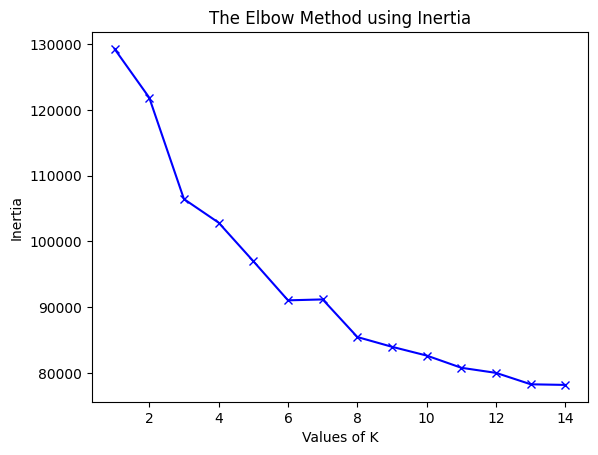

In [132]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

# `Model Building using KMeans`

In [139]:
kmeans_model=KMeans(3)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

# `Visualizing the clustered dataframe`

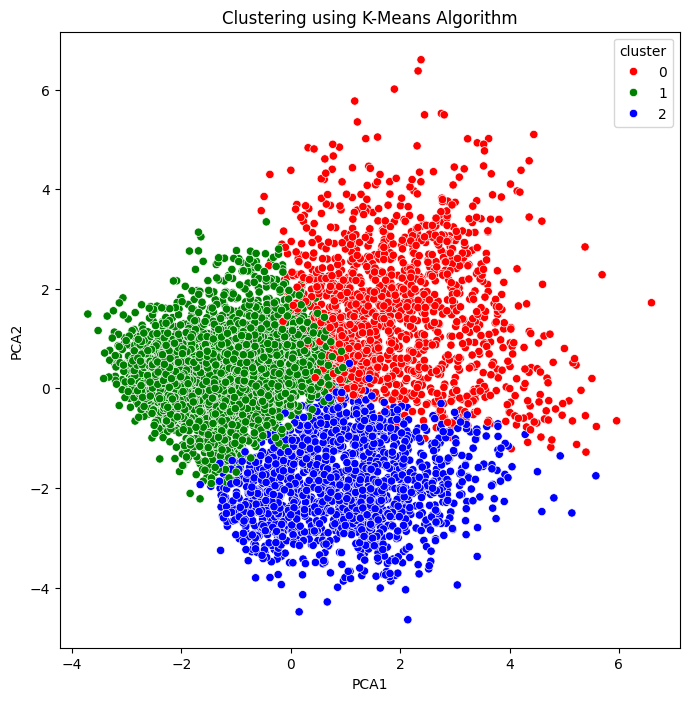

In [145]:
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="cluster",
    data=pca_df_kmeans,
    palette=['red', 'green', 'blue']  # Match the number of clusters
)
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [146]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.901146,45.979226,0.747135,2.457736,3.026504,1.495702,2.387536,2.363897e-01,35.656877,4.140401,2.255014,2.535100,11169.600287,1094.422636,10075.177650,0.730140,3620.299427,62.881089,0.694413,0.102289
1,0.986152,46.111373,0.234237,2.440778,3.114025,1.504714,3.231291,2.946376e-04,35.680318,3.885091,2.182970,2.335592,3228.528933,1240.064231,1988.464702,0.757520,4391.275192,74.308486,0.753757,0.425002
2,0.463240,47.274955,0.380753,2.227137,3.001195,1.361028,3.007770,1.804112e-16,36.745965,3.881052,2.476390,2.793186,3772.524447,975.934848,2796.589600,0.669178,1953.284519,39.741184,0.547566,0.292362


In [147]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster
10,1.0,42.0,1.0,5.0,5.0,3.0,0.0,0.0,31.0,5.0,...,2.0,6748.0,1467.0,5281.0,0.831,1201.0,42.0,0.680,0.217,2.0
14,1.0,57.0,0.0,2.0,2.0,1.0,4.0,0.0,48.0,5.0,...,2.0,2436.0,680.0,1756.0,1.190,1570.0,29.0,0.611,0.279,2.0
19,1.0,45.0,0.0,2.0,2.0,1.0,5.0,0.0,37.0,6.0,...,2.0,14470.0,1157.0,13313.0,0.966,1207.0,21.0,0.909,0.080,2.0
21,0.0,62.0,0.0,0.0,2.0,1.0,4.0,0.0,49.0,2.0,...,3.0,1438.3,0.0,1438.3,1.047,692.0,16.0,0.600,0.000,2.0
23,1.0,47.0,0.0,4.0,6.0,2.0,4.0,0.0,36.0,3.0,...,2.0,2492.0,1560.0,932.0,0.573,1126.0,23.0,0.353,0.626,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [148]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster
49,1.0,52.0,1.0,1.0,0.0,2.0,3.0,0.0,40.0,5.0,...,1.0,4745.0,1227.0,3518.0,0.624,1140.0,40.0,0.600,0.259,0.0
51,0.0,54.0,0.0,1.0,2.0,1.0,4.0,0.0,40.0,2.0,...,1.0,1438.3,808.0,630.3,0.997,705.0,19.0,0.900,0.562,0.0
60,1.0,55.0,1.0,3.0,6.0,1.0,3.0,0.0,47.0,4.0,...,3.0,3436.0,2016.0,1420.0,0.901,1097.0,33.0,0.833,0.587,0.0
62,1.0,39.0,1.0,1.0,3.0,0.0,2.0,0.0,33.0,5.0,...,3.0,5926.0,1251.0,4675.0,0.944,1316.0,28.0,1.154,0.211,0.0
64,1.0,53.0,1.0,2.0,3.0,2.0,0.0,0.0,44.0,4.0,...,2.0,14734.0,1634.0,13100.0,0.989,1289.0,23.0,0.917,0.111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [149]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster
35,1.0,55.0,0.0,1.0,0.0,2.0,4.0,0.0,36.0,4.0,...,1.0,3520.0,1914.0,1606.0,0.510,1407.0,43.0,0.483,0.544,1.0
66,1.0,57.0,1.0,2.0,0.0,1.0,2.0,0.0,52.0,5.0,...,3.0,6584.0,1817.0,4767.0,0.620,1353.0,35.0,0.667,0.276,1.0
155,1.0,42.0,0.0,5.0,6.0,1.0,1.0,0.0,36.0,3.0,...,3.0,2038.0,0.0,2038.0,0.786,1238.0,28.0,0.750,0.000,1.0
157,1.0,49.0,1.0,1.0,1.0,1.0,0.0,0.0,38.0,6.0,...,3.0,9364.0,618.0,8746.0,0.554,1099.0,27.0,0.800,0.066,1.0
159,1.0,43.0,0.0,4.0,2.0,0.0,4.0,0.0,34.0,2.0,...,1.0,3195.0,1954.0,1241.0,0.971,1285.0,29.0,0.706,0.612,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [150]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster
10,1.0,42.0,1.0,5.0,5.0,3.0,0.0,0.0,31.0,5.0,...,2.0,6748.0,1467.0,5281.0,0.831,1201.0,42.0,0.680,0.217,2.0
14,1.0,57.0,0.0,2.0,2.0,1.0,4.0,0.0,48.0,5.0,...,2.0,2436.0,680.0,1756.0,1.190,1570.0,29.0,0.611,0.279,2.0
19,1.0,45.0,0.0,2.0,2.0,1.0,5.0,0.0,37.0,6.0,...,2.0,14470.0,1157.0,13313.0,0.966,1207.0,21.0,0.909,0.080,2.0
21,0.0,62.0,0.0,0.0,2.0,1.0,4.0,0.0,49.0,2.0,...,3.0,1438.3,0.0,1438.3,1.047,692.0,16.0,0.600,0.000,2.0
23,1.0,47.0,0.0,4.0,6.0,2.0,4.0,0.0,36.0,3.0,...,2.0,2492.0,1560.0,932.0,0.573,1126.0,23.0,0.353,0.626,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


# `Visualization of Clusters`

<Axes: xlabel='Cluster', ylabel='count'>

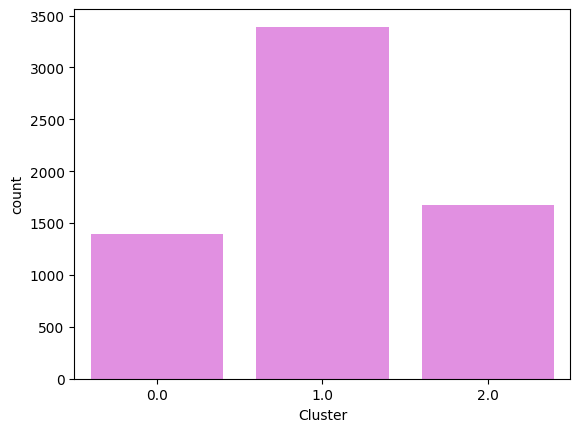

In [159]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df, color='violet')

`Most of the Data belongs to Cluster 1`

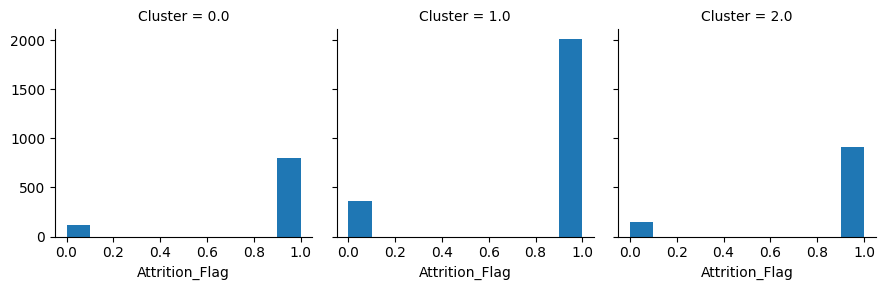

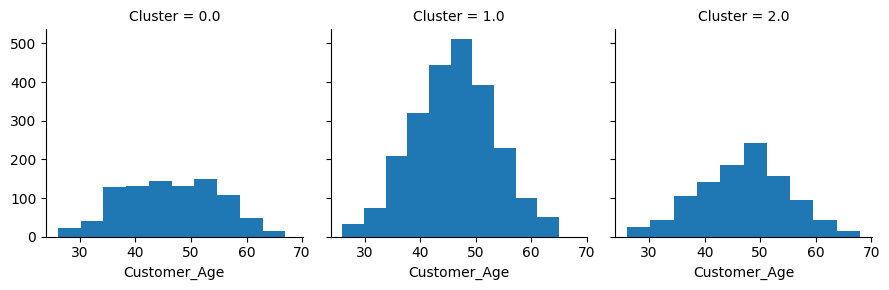

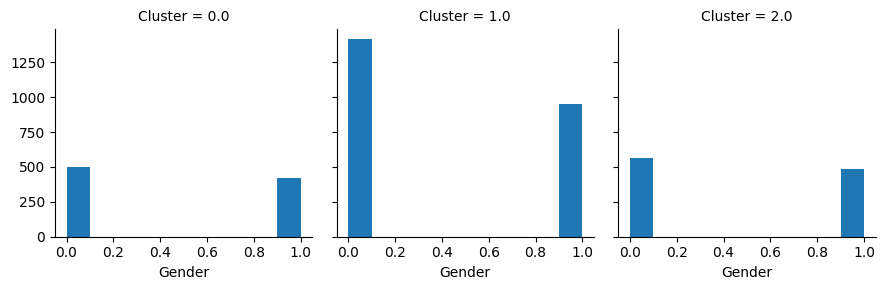

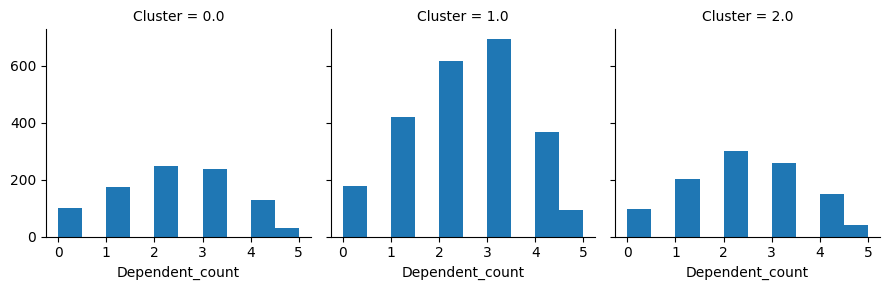

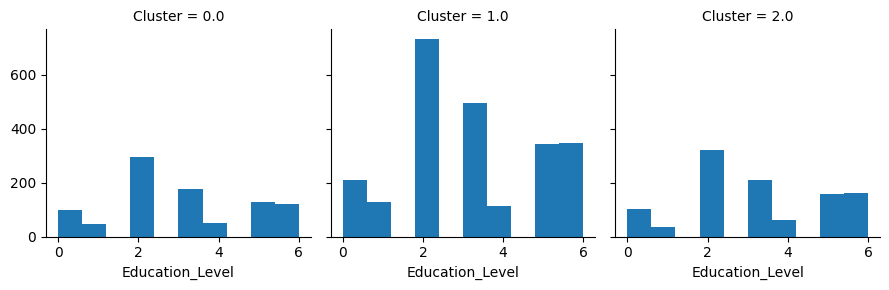

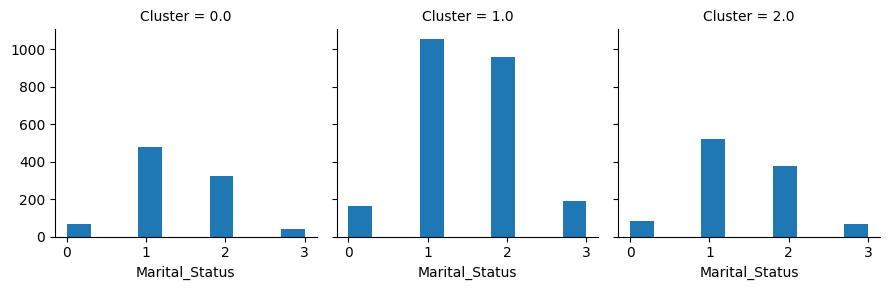

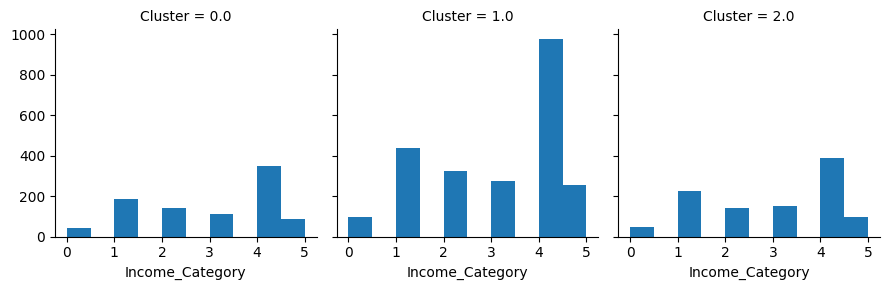

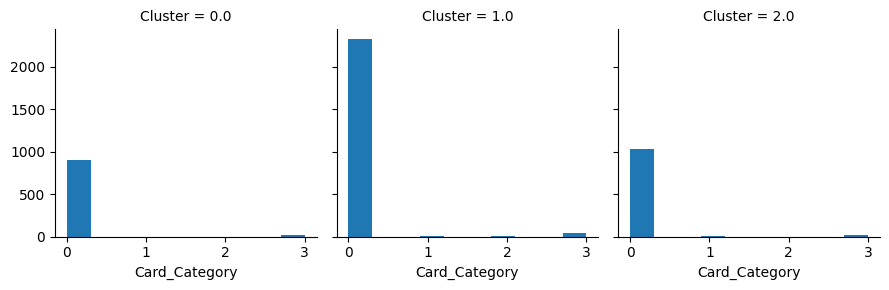

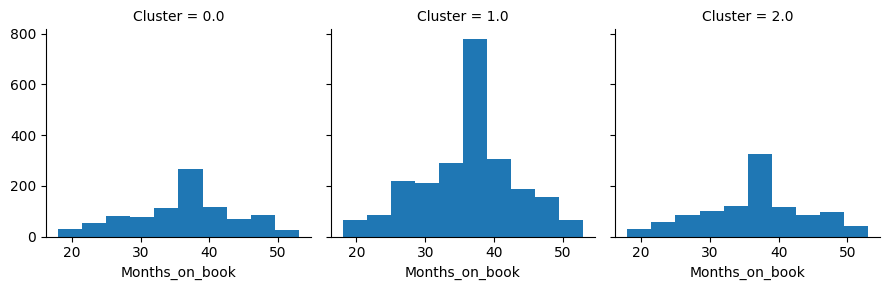

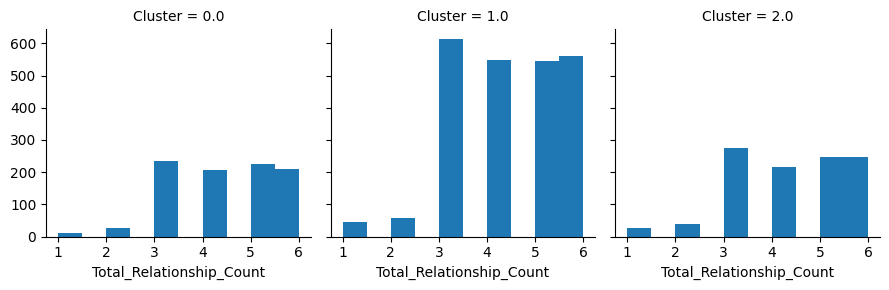

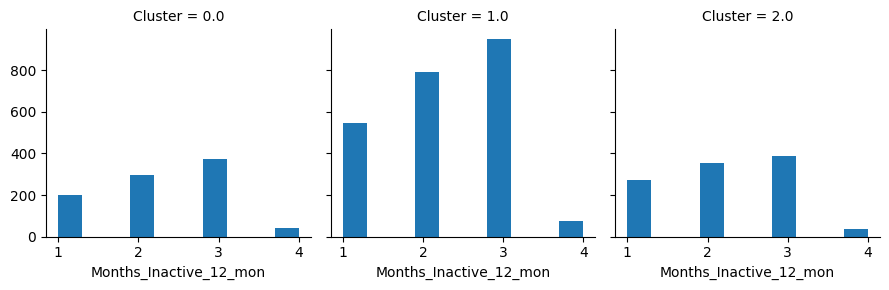

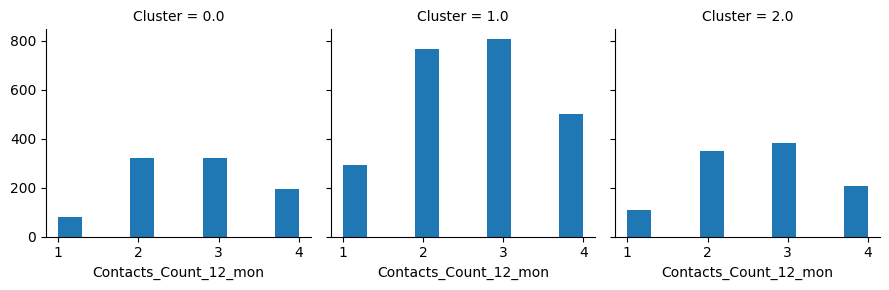

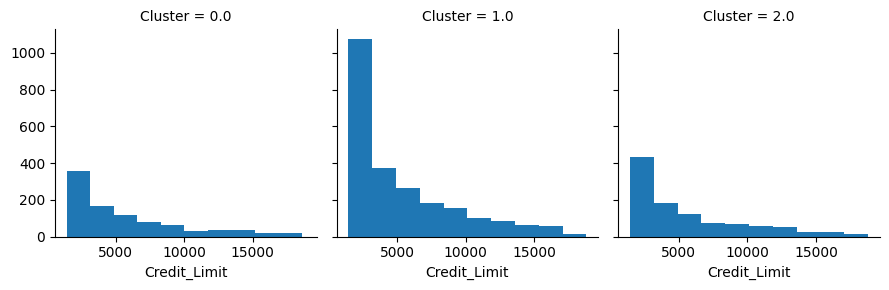

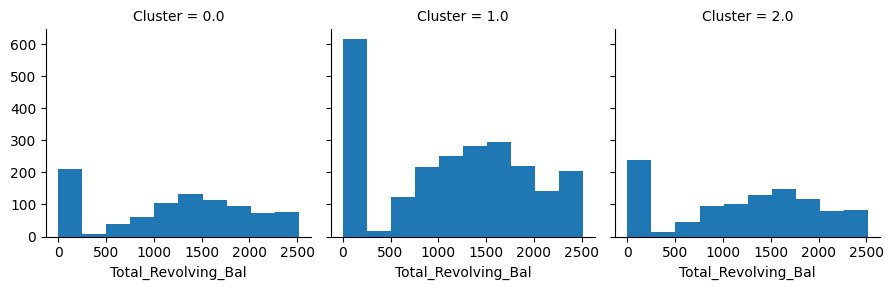

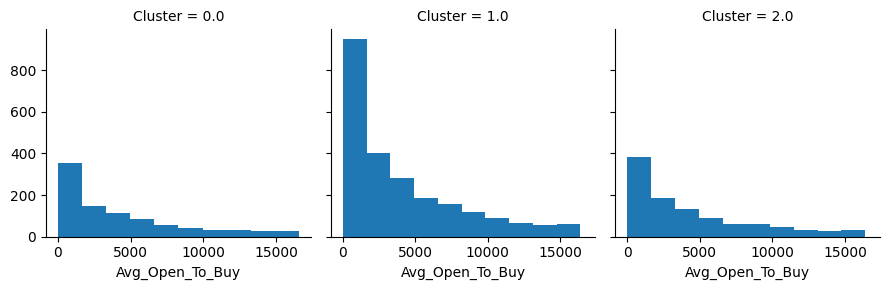

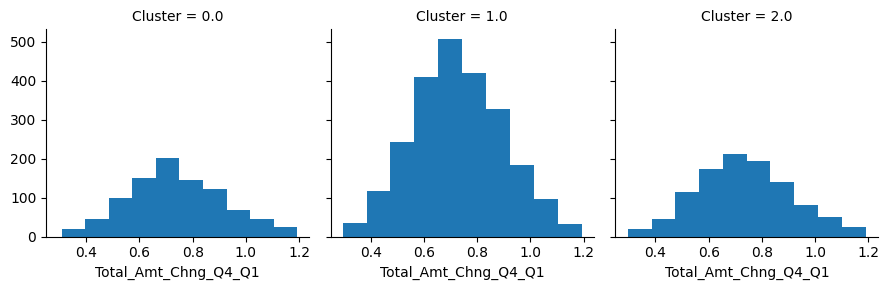

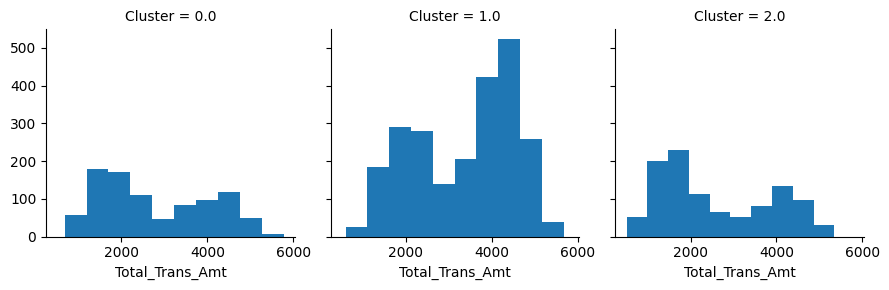

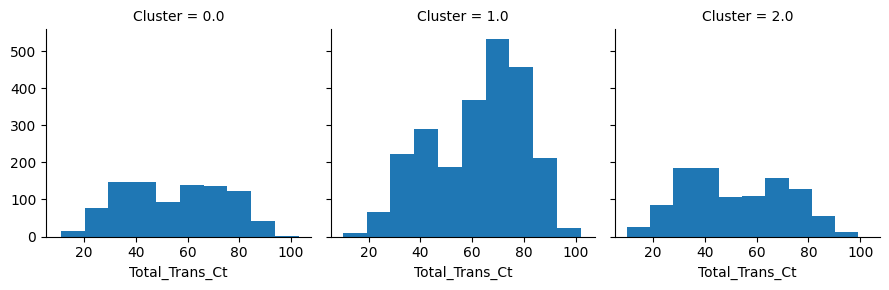

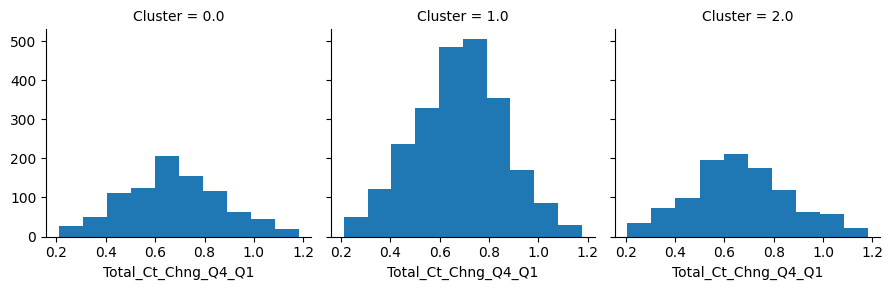

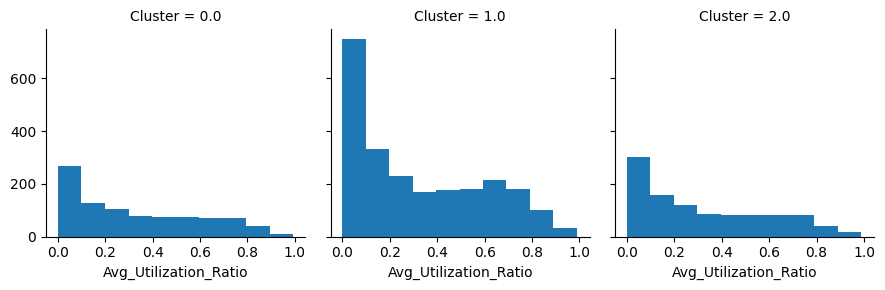

In [160]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

# `Saving the kmeans clustering model and the data with cluster label`

In [161]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [162]:
cluster_df.to_csv("Clustered_Customer_Data.csv")